In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
# More imports
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:

df = pd.read_excel('/content/TestDataset.xlsx')
# pd.read_csv('https://raw.githubusercontent.com/IanWhittemore657/Tensorflow/master/StockPredicitions.csv')

In [ ]:
df.head()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation
0,1,2020-06-17,0,0,4,4,0,0,0,0,1,4,0
1,2,2020-06-17,1,0,6,4,0,0,0,0,1,4,0
2,3,2020-06-17,2,0,5,4,0,0,1,0,1,4,0
3,1,2020-06-18,0,0,3,4,0,0,0,0,0,6,0
4,2,2020-06-18,1,0,7,4,0,0,0,0,0,6,0


In [ ]:
df.tail()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation
589,2,2020-12-30,1,2,9,4,0,0,0,0,1,11,0
590,3,2020-12-30,2,2,9,4,0,0,1,0,1,11,0
591,1,2020-12-31,0,1,9,4,0,0,0,1,1,10,0
592,2,2020-12-31,1,1,8,4,0,0,0,1,1,10,0
593,3,2020-12-31,2,1,8,4,0,0,1,1,1,10,0


In [ ]:

series = df['Number of Insects'].values.reshape(-1, 1)

In [ ]:
series

array([[ 4],
       [ 6],
       [ 5],
       [ 3],
       [ 7],
       [ 5],
       [ 5],
       [ 7],
       [ 8],
       [18],
       [19],
       [17],
       [20],
       [26],
       [22],
       [ 9],
       [10],
       [ 8],
       [11],
       [15],
       [17],
       [26],
       [24],
       [29],
       [18],
       [12],
       [20],
       [ 9],
       [ 7],
       [ 7],
       [11],
       [14],
       [10],
       [13],
       [17],
       [13],
       [ 5],
       [ 4],
       [ 8],
       [10],
       [ 9],
       [ 9],
       [ 3],
       [ 4],
       [ 4],
       [12],
       [15],
       [18],
       [18],
       [17],
       [21],
       [25],
       [23],
       [26],
       [28],
       [29],
       [31],
       [36],
       [37],
       [40],
       [10],
       [11],
       [10],
       [11],
       [12],
       [10],
       [ 9],
       [ 8],
       [10],
       [ 6],
       [ 5],
       [ 7],
       [14],
       [16],
       [13],
       [18],
       [21],

In [ ]:
df.head()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation
0,1,2020-06-17,0,0,4,4,0,0,0,0,1,4,0
1,2,2020-06-17,1,0,6,4,0,0,0,0,1,4,0
2,3,2020-06-17,2,0,5,4,0,0,1,0,1,4,0
3,1,2020-06-18,0,0,3,4,0,0,0,0,0,6,0
4,2,2020-06-18,1,0,7,4,0,0,0,0,0,6,0


In [ ]:
# Normalize the data

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [ ]:
series

array([-1.1478177 , -0.93712434, -1.04247102, -1.25316438, -0.83177766,
       -1.04247102, -1.04247102, -0.83177766, -0.72643098,  0.32703582,
        0.4323825 ,  0.22168914,  0.53772918,  1.16980926,  0.74842254,
       -0.6210843 , -0.51573762, -0.72643098, -0.41039094,  0.01099578,
        0.22168914,  1.16980926,  0.9591159 ,  1.4858493 ,  0.32703582,
       -0.30504426,  0.53772918, -0.6210843 , -0.83177766, -0.83177766,
       -0.41039094, -0.0943509 , -0.51573762, -0.19969758,  0.22168914,
       -0.19969758, -1.04247102, -1.1478177 , -0.72643098, -0.51573762,
       -0.6210843 , -0.6210843 , -1.25316438, -1.1478177 , -1.1478177 ,
       -0.30504426,  0.01099578,  0.32703582,  0.32703582,  0.22168914,
        0.64307586,  1.06446258,  0.85376922,  1.16980926,  1.38050262,
        1.4858493 ,  1.69654266,  2.22327606,  2.32862274,  2.64466278,
       -0.51573762, -0.41039094, -0.51573762, -0.41039094, -0.30504426,
       -0.51573762, -0.6210843 , -0.72643098, -0.51573762, -0.93

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (584, 10, 1) Y.shape (584,)


In [ ]:
 Y

array([ 0.4323825 ,  0.22168914,  0.53772918,  1.16980926,  0.74842254,
       -0.6210843 , -0.51573762, -0.72643098, -0.41039094,  0.01099578,
        0.22168914,  1.16980926,  0.9591159 ,  1.4858493 ,  0.32703582,
       -0.30504426,  0.53772918, -0.6210843 , -0.83177766, -0.83177766,
       -0.41039094, -0.0943509 , -0.51573762, -0.19969758,  0.22168914,
       -0.19969758, -1.04247102, -1.1478177 , -0.72643098, -0.51573762,
       -0.6210843 , -0.6210843 , -1.25316438, -1.1478177 , -1.1478177 ,
       -0.30504426,  0.01099578,  0.32703582,  0.32703582,  0.22168914,
        0.64307586,  1.06446258,  0.85376922,  1.16980926,  1.38050262,
        1.4858493 ,  1.69654266,  2.22327606,  2.32862274,  2.64466278,
       -0.51573762, -0.41039094, -0.51573762, -0.41039094, -0.30504426,
       -0.51573762, -0.6210843 , -0.72643098, -0.51573762, -0.93712434,
       -1.04247102, -0.83177766, -0.0943509 ,  0.11634246, -0.19969758,
        0.32703582,  0.64307586,  0.53772918, -0.72643098, -0.62

In [ ]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
10/10 [==============================] - 1s 52ms/step - loss: 0.5650 - val_loss: 0.3800
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3488 - val_loss: 0.3613
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3258 - val_loss: 0.3674
Epoch 4/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3122 - val_loss: 0.3660
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.3238 - val_loss: 0.3657
Epoch 6/80
10/10 [==============================] - 0s 10ms/step - loss: 0.3483 - val_loss: 0.3956
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3307 - val_loss: 0.3736
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.3156 - val_loss: 0.3614
Epoch 9/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3296 - val_loss: 0.3662
Epoch 10/80
10/10 [==============================] - 0s 9ms/step - loss: 0.3222 - val_loss: 0.3657
Epoch 11/80
10/

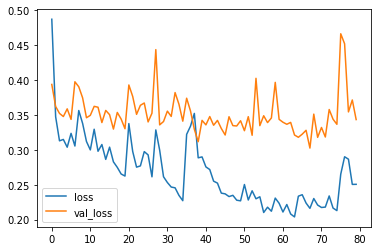

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(584, 1)


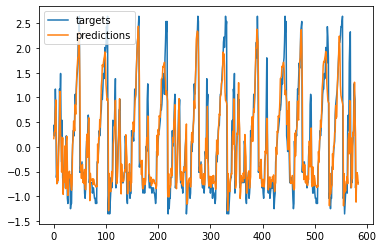

In [ ]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

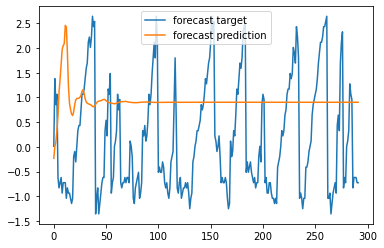

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# calculate returns by first shifting the data
df['PrevNumber of Insects'] = df['Number of Insects'].shift(1) # move everything up 1

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [ ]:
df.head()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation,PrevNumber of Insects
0,1,2020-06-17,0,0,4,4,0,0,0,0,1,4,0,NaN
1,2,2020-06-17,1,0,6,4,0,0,0,0,1,4,0,4.0
2,3,2020-06-17,2,0,5,4,0,0,1,0,1,4,0,6.0
3,1,2020-06-18,0,0,3,4,0,0,0,0,0,6,0,5.0
4,2,2020-06-18,1,0,7,4,0,0,0,0,0,6,0,3.0


In [ ]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['ReturnNumber of Insects'] = (df['Number of Insects'] + df['PrevNumber of Insects']) / 2

In [ ]:
df.head()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation,PrevNumber of Insects,ReturnNumber of Insects
0,1,2020-06-17,0,0,4,4,0,0,0,0,1,4,0,NaN,NaN
1,2,2020-06-17,1,0,6,4,0,0,0,0,1,4,0,4.0,5.0
2,3,2020-06-17,2,0,5,4,0,0,1,0,1,4,0,6.0,5.5
3,1,2020-06-18,0,0,3,4,0,0,0,0,0,6,0,5.0,4.0
4,2,2020-06-18,1,0,7,4,0,0,0,0,0,6,0,3.0,5.0


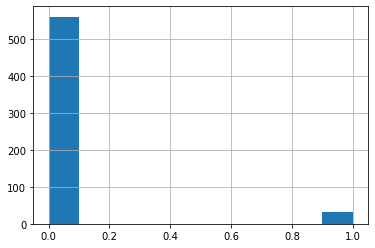

In [ ]:
# Now let's try an LSTM to predict returns
df['Infestation'].hist()

In [ ]:
series = df['Infestation'].values[1:].reshape(-1, 1)

# Normalize the data

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (583, 10, 1) Y.shape (583,)


In [ ]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
10/10 [==============================] - 1s 53ms/step - loss: 1.0910 - val_loss: 1.2380
Epoch 2/80
10/10 [==============================] - 0s 9ms/step - loss: 1.0244 - val_loss: 1.1751
Epoch 3/80
10/10 [==============================] - 0s 9ms/step - loss: 0.9572 - val_loss: 1.1007
Epoch 4/80
10/10 [==============================] - 0s 10ms/step - loss: 0.8966 - val_loss: 1.0217
Epoch 5/80
10/10 [==============================] - 0s 10ms/step - loss: 0.8369 - val_loss: 0.9588
Epoch 6/80
10/10 [==============================] - 0s 9ms/step - loss: 0.7877 - val_loss: 0.8896
Epoch 7/80
10/10 [==============================] - 0s 9ms/step - loss: 0.7328 - val_loss: 0.8370
Epoch 8/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6890 - val_loss: 0.7955
Epoch 9/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6619 - val_loss: 0.7618
Epoch 10/80
10/10 [==============================] - 0s 10ms/step - loss: 0.6385 - val_loss: 0.7436
Epoch 11/80
1

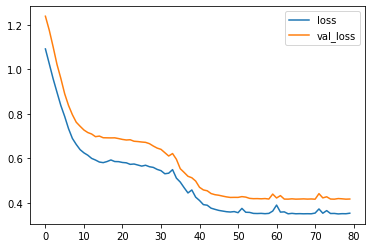

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(583, 1)


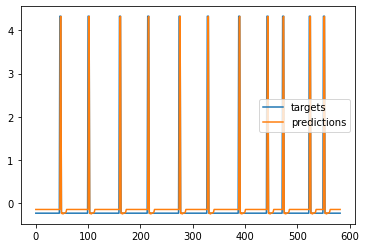

In [ ]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

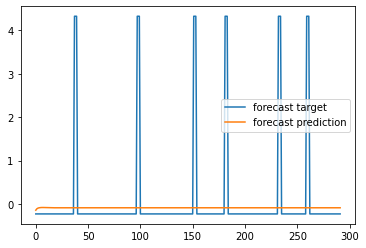

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Now turn the full data into numpy arrays

input_data = df[['Number of Insects' ,'Season'	,'Humidity'	,'Location'	,'Crop Habitat'	,'Wind'	,'Rain'	,'Sunlight',]].values 
targets = df['Infestation'].values

In [ ]:
# make the actual data which will go into the neural network
T = 3 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T 

In [ ]:
# normalize the inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [ ]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [ ]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [ ]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

In [ ]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
13/13 [==============================] - 1s 41ms/step - loss: 0.6615 - accuracy: 0.6591 - val_loss: 0.6268 - val_accuracy: 0.7744
Epoch 2/300
13/13 [==============================] - 0s 8ms/step - loss: 0.5927 - accuracy: 0.8460 - val_loss: 0.5652 - val_accuracy: 0.8718
Epoch 3/300
13/13 [==============================] - 0s 8ms/step - loss: 0.5172 - accuracy: 0.9116 - val_loss: 0.4887 - val_accuracy: 0.8872
Epoch 4/300
13/13 [==============================] - 0s 8ms/step - loss: 0.4255 - accuracy: 0.9343 - val_loss: 0.3986 - val_accuracy: 0.8974
Epoch 5/300
13/13 [==============================] - 0s 8ms/step - loss: 0.3238 - accuracy: 0.9470 - val_loss: 0.3116 - val_accuracy: 0.9231
Epoch 6/300
13/13 [==============================] - 0s 8ms/step - loss: 0.2333 - accuracy: 0.9545 - val_loss: 0.2451 - val_accuracy: 0.9231
Epoch 7/300
13/13 [==============================] - 0s 8ms/step - loss: 0.1715 - accuracy: 0.9545 - val_loss: 0.2098 - val_accuracy: 0.9231
Epoch 8/300


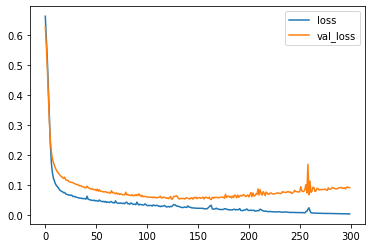

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

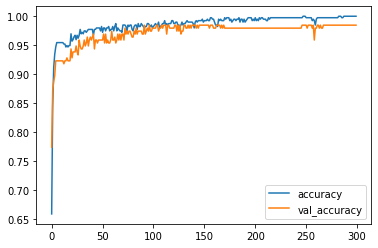

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()